In [1]:
import os
os.getcwd()


'C:\\Users\\KSHITIZ\\OneDrive\\Desktop\\flood-prediction-uttarakhand-ml'

In [2]:
# Block 1: Imports and data loading
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset
df = pd.read_csv("Aqualert_data.csv")

# Quick data overview
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn info:")
print(df.info())


Dataset shape: (1248, 9)

First 5 rows:
   Year  Month  Latitude  Longitude  Flood_Status  elevation    rainfall  \
0  2021      5    29.861     77.888             0        278   59.790101   
1  2005     12    29.942     78.165             0        279    7.906664   
2  2021      2    30.507     79.128             1       1876   13.402422   
3  2025     11    31.002     78.542             0       5759  623.862621   
4  2012      5    30.535     79.185             0       2027   27.483486   

   slope  aspect  
0      7     188  
1      1     229  
2     47     145  
3     52     193  
4     37     346  

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1248 non-null   int64  
 1   Month         1248 non-null   int64  
 2   Latitude      1248 non-null   float64
 3   Longitude     1248 non-null   float64
 4   Flood_

In [3]:
# Block 2: Preprocessing - features, target, and cleaning
# Select features (drop non-predictive columns)
feature_columns = ['Year', 'Month', 'Latitude', 'Longitude', 'index'] + ['Flood_Status']
drop_cols = [col for col in feature_columns if col in df.columns]
X = df.drop(drop_cols, axis=1)
y = df['Flood_Status']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget distribution:")
print(y.value_counts(normalize=True).round(3))

# Remove duplicates
df_clean = df.drop_duplicates()
print(f"\nDuplicates removed: {len(df) - len(df_clean)}")

# Note: If categorical columns need encoding, add here (uncomment example below)
# X = pd.get_dummies(X, columns=['Location Description'], drop_first=True)


Features shape: (1248, 4)
Target shape: (1248,)

Target distribution:
Flood_Status
0    0.5
1    0.5
Name: proportion, dtype: float64

Duplicates removed: 20


In [4]:
# Block 3: Train-test split and model training
from sklearn.model_selection import train_test_split  # Already imported, but safe here

# Split data: 80% train, 20% test (stratified for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# Train Random Forest (balanced for flood class imbalance)
rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)
rf.fit(X_train, y_train)

print("\nModel trained successfully!")


Training set: (998, 4) (998,)
Test set: (250, 4) (250,)

Model trained successfully!


In [5]:
# Block 4: Model evaluation on test set
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # Probability of positive class (flood)

# Key metrics
print("Test set performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Confusion matrix (simple view)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test set performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       125
           1       0.92      0.91      0.92       125

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250


ROC AUC Score: 0.9565

Confusion Matrix:
[[115  10]
 [ 11 114]]


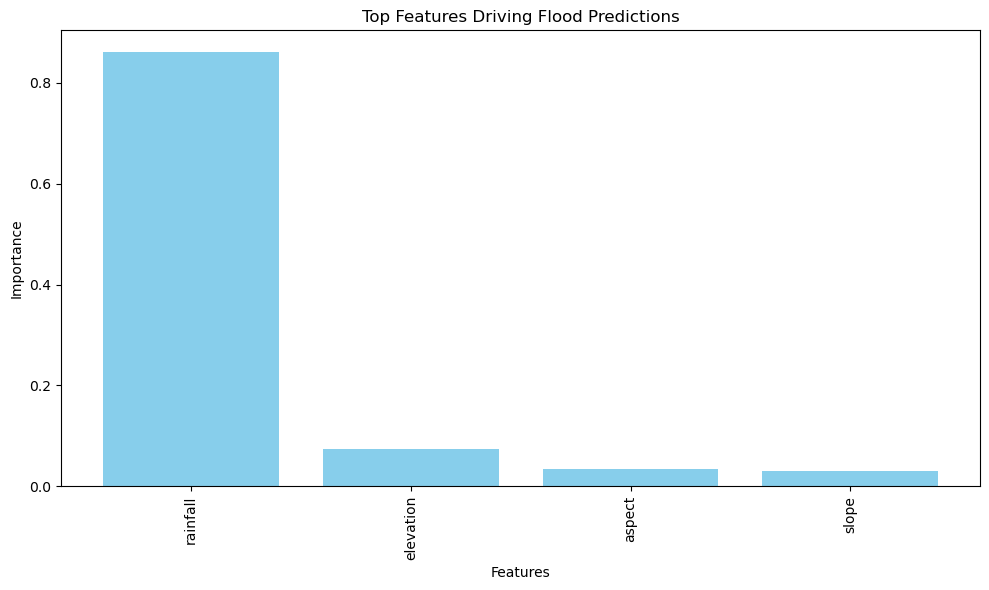

Top 5 features:
rainfall: 0.861
elevation: 0.074
aspect: 0.035
slope: 0.031


In [6]:
# Block 5: Feature importance (what drives flood predictions?)
import matplotlib.pyplot as plt

# Get and sort feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices]

# Plot top features
plt.figure(figsize=(10, 6))
plt.title("Top Features Driving Flood Predictions")
plt.bar(range(len(importances)), importances[indices], color='skyblue')
plt.xticks(range(len(importances)), top_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Print top 5 for reference
print("Top 5 features:")
for i in range(min(5, len(top_features))):
    print(f"{top_features[i]}: {importances[indices[i]]:.3f}")


In [7]:
# Block 6: Save trained model for API/deployment
import joblib
joblib.dump(rf, 'flood_model.pkl')
print("Model saved: flood_model.pkl (ready for live predictions)")


Model saved: flood_model.pkl (ready for live predictions)
